In [120]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
#mpld3.enable_notebook()
import mpld3
import matplotlib.pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Parse through the file, and create a pandas DataFrame database style table to hold all event information

In [121]:
from src import transform 
from src import read_log_file as readlog
filename = "datasets/long_simulation_log"
# filename = "/Users/ellisbrown/Desktop/Project/datasets/long_amzn_workload.log"
database_table = readlog.get_parsed_data_from_file(filename)
# print(database_table)

### Seperate the stop the world and concurrent events for analysis
### Then, for each event name, create a list of all corresponding data tables

In [122]:
stw_table, concurrent_table = transform.seperate_pauses_concurrent(database_table)
stw_seperated_tables = transform.seperate_by_event_name(stw_table)
concurrent_seperated_tables = transform.seperate_by_event_name(concurrent_table)

### Plot the concurrent and stop the world periods


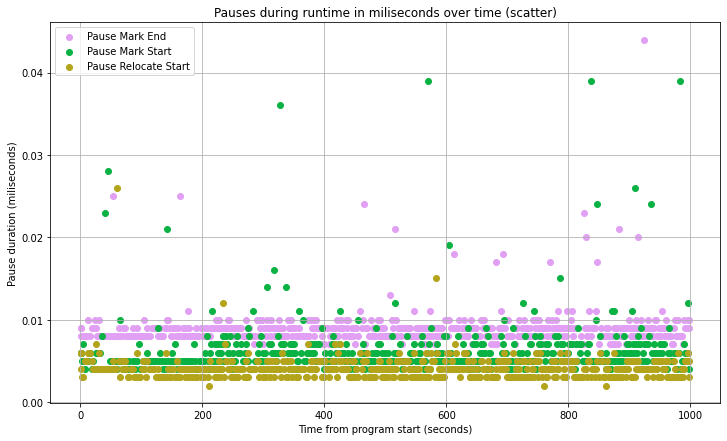

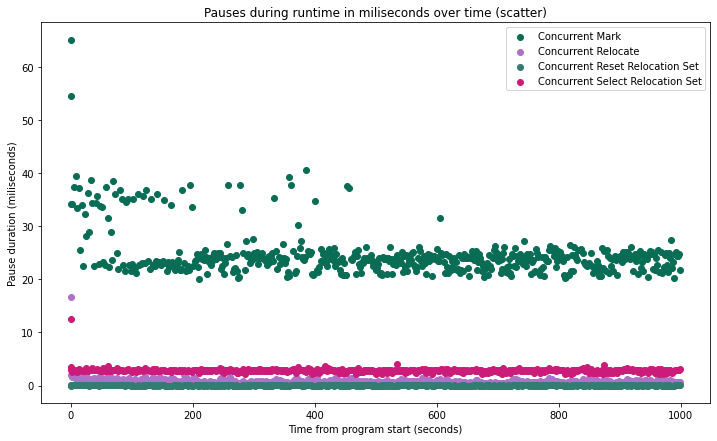

In [123]:
from src import graphing as graph
# Stop the world pauses. Use the seperated events to see each type of pause
if stw_seperated_tables:
    stw_time_lists, stw_duration_lists = transform.get_times_and_durations_from_event_lists(stw_seperated_tables)
    labels = transform.get_event_table_labels(stw_seperated_tables)
    plot = graph.comparrison_scatter(stw_time_lists, stw_duration_lists, None, None, labels)

# Concurrent periods. Use the seperated events to see each type of concurrent duration
if concurrent_seperated_tables:
    c_time_lists, c_duration_lists = transform.get_times_and_durations_from_event_lists(concurrent_seperated_tables)
    labels = transform.get_event_table_labels(concurrent_seperated_tables)
    plot = graph.comparrison_scatter(c_time_lists, c_duration_lists, None, None, labels)

### Time spent in Concurrent Phases vs. Stop The World phases

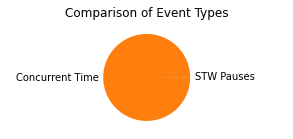

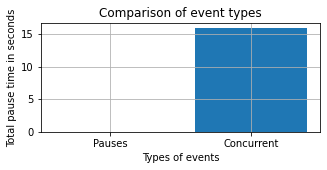

In [124]:
plt.rcParams["figure.figsize"] = [5, 2] # make this figure smaller (not needed to be large)
import numpy as np
_ = graph.compare_eventtypes_pie(database_table)
ax = graph.compare_eventtypes_bar(database_table)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(["Pauses", "Concurrent"])

plt.rcParams["figure.figsize"] = [12, 7] # Return figure to default size

### Print trends about the events based on Event Type and Name

In [125]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]

print("\t\t =========== Concurrent Vs Pauses Table ===========\n")
print_title = True
if not stw_table.empty:
    stw_times,stw_durations  = transform.get_time_and_event_durations(stw_table)
    graph.print_trends(stw_durations, "Pauses", print_title, timestamps=stw_times, )
    print_title = False
else:
    print("No STW data")
if not concurrent_table.empty:
    concurrent_times, concurrent_durations = transform.get_time_and_event_durations(concurrent_table)
    graph.print_trends(concurrent_durations, "Concurrent", print_title)
else:
    print("No concurrent data")
print("\n\n")
    #graph.compare_trends([stw_durations, concurrent_durations], labels = labels, lists_of_timestamps = [stw_times, concurrent_times])
    #print("\n\n\n")



if concurrent_seperated_tables:
    # Concurrent pauses comparison
    print("\t\t\t=========== Concurrent Table ===========\n")
    labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
    graph.compare_trends(c_duration_lists, labels = labels)
    print("\n\n\n")

if stw_seperated_tables:
    # Stop the world pauses comparison
    labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
    print("\t\t\t=========== Pauses Table ===========\n")
    graph.compare_trends(stw_duration_lists, labels = labels)



		 =========== Concurrent Vs Pauses Table ===========

 Trends (ms)      | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     | Throughput   |
-------------------------------------------------------------------------------------------------------------
Pauses            | 1689         | 0.044        | 10.894       | 0.0064       | 0.0034       | 100.0%       | 
Concurrent        | 2252         | 65.214       | 15887.201    | 7.0547       | 10.4073      | 



			=========== Concurrent Table ===========

 Trends (ms)      | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
----------------------------------------------------------------------------------------------
Mark              | 563          | 65.214       | 13843.951    | 24.5896      | 4.2717       | 
Relocate          | 563          | 16.651       | 449.935      | 0.7992       | 0.7455       | 
Reset Relocation  | 563          | 0.098        | 1.059        | 0.0019       | 0.0042  

### Compare percentiles for pauses/concurrent phases, general and specific


In [126]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]

print("\t\t\t=========== Concurrent Vs Pauses ===========\n")
graph.compare_pauses_percentiles([stw_durations, concurrent_durations], labels = labels)
print("\n\n\n")


# Concurrent pauses comparison
if concurrent_seperated_tables:
    print("\t\t\t=========== Concurrent Percentiles ===========\n")
    labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
    graph.compare_pauses_percentiles(c_duration_lists, labels = labels)
    print("\n\n\n")

# Stop the world pauses comparison
if stw_seperated_tables:
    labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
    print("\t\t\t=========== Pauses Percentiles ===========\n")
    graph.compare_pauses_percentiles(stw_duration_lists, labels = labels)




			=========== Concurrent Vs Pauses ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Pauses     | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.02 ms   | 0.04 ms   | 0.04 ms   | 
Concurrent | 2.21 ms   | 17.52 ms  | 24.15 ms  | 25.06 ms  | 35.83 ms  | 40.32 ms  | 62.83 ms  | 




			=========== Concurrent Percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Mark       | 23.8 ms   | 24.84 ms  | 26.63 ms  | 35.13 ms  | 38.69 ms  | 59.27 ms  | 64.62 ms  | 
Relocate   | 0.69 ms   | 0.91 ms   | 1.2 ms    | 1.43 ms   | 2.0 ms    | 9.17 ms   | 15.9 ms   | 
Reset Relo | 0.0 ms    | 0.0 ms    | 0.0 ms    | 0.0 ms    | 0.0 ms    | 0.05 ms   | 0.09 ms   | 
Select Rel | 2.8

### Average time in seconds per phase  / grouping

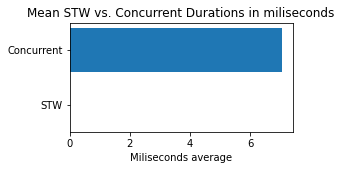

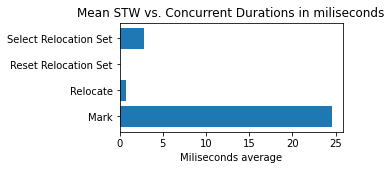

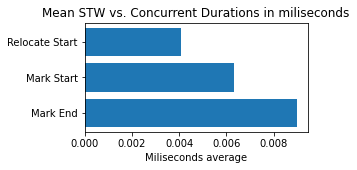

In [129]:
import numpy as np

if stw_durations and concurrent_durations: 
    plt.rcParams["figure.figsize"] = [4, 2]
    # Compare stop the world vs concurrent IN GENERL (not specific sub categories)
    labels = ["STW", "Concurrent"]
    fig, ax = plt.subplots()
    y, y1 = stw_durations, concurrent_durations # i know , this is not good code. I will fix this when I turn this into an API Call. (UPcoming planned for tomorrow)
    pause_avg = round(sum(y)/len(y), 4)
    concurrent_avg = round(sum(y1)/len(y1), 4)
    ax.barh(np.arange(len(labels)), [pause_avg, concurrent_avg], align = 'center')
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_xlabel('Miliseconds average')
    ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')
    ########

    labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
    fig, ax = plt.subplots()
    c_duration_averages = []
    for i in range(len(c_duration_lists)):
        c_duration_averages.append(sum(c_duration_lists[i]) / len(c_duration_lists[i]))
    ax.barh(np.arange(len(c_duration_averages)), c_duration_averages, align = 'center')
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_xlabel('Miliseconds average')
    ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')


    fig, ax = plt.subplots()
    labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
    stw_duration_averages = []
    for i in range(len(stw_duration_lists)):
        stw_duration_averages.append(sum(stw_duration_lists[i]) / len(stw_duration_lists[i]))
    ax.barh(np.arange(len(labels)), stw_duration_averages, align = 'center')
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_xlabel('Miliseconds average')
    ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')

    plt.rcParams["figure.figsize"] = [12, 7]


### Show latency heatmap

In [130]:
heatmap, dimensions = transform.get_heatmap_data(database_table, 20, 50, 30, 5, True) # Hides errors with range
                                                                                       # Set true to false 
graph.plot_heatmap(heatmap, dimensions, True)
graph.plot_heatmap(heatmap, dimensions, False)
plt.rcParams["figure.figsize"] = [12, 7]

TypeError: float() argument must be a string or a number, not 'NoneType'

### Plotting bar lines to display latency: Thicker and taller means longer duration pause.

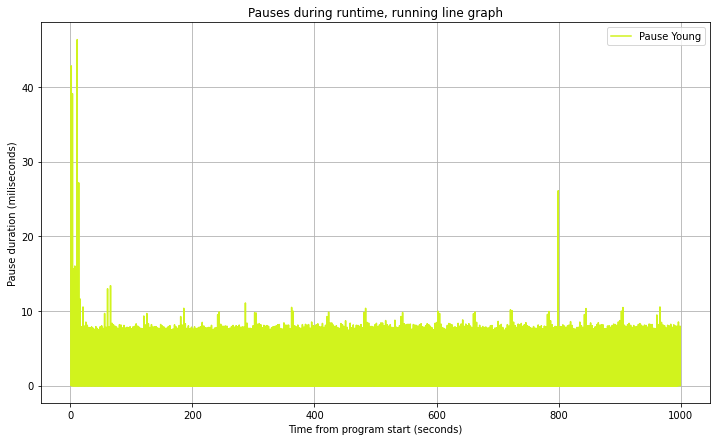

In [109]:
# Pauses during runtime
from src import graphing as graph

# Stop the world pauses
if stw_seperated_tables:
    labels = transform.get_event_table_labels(stw_seperated_tables)
    labels.reverse() 
    graph.compare_paused_running_line(stw_time_lists, stw_duration_lists, None, None, labels, False)

# Concurrent periods
if concurrent_seperated_tables:
    labels = transform.get_event_table_labels(concurrent_seperated_tables)
    plot = graph.compare_paused_running_line(c_time_lists, c_duration_lists, None, None, labels)

### Allocation over time

Warning! Maximum heap size must be manually set, and may not be correct.


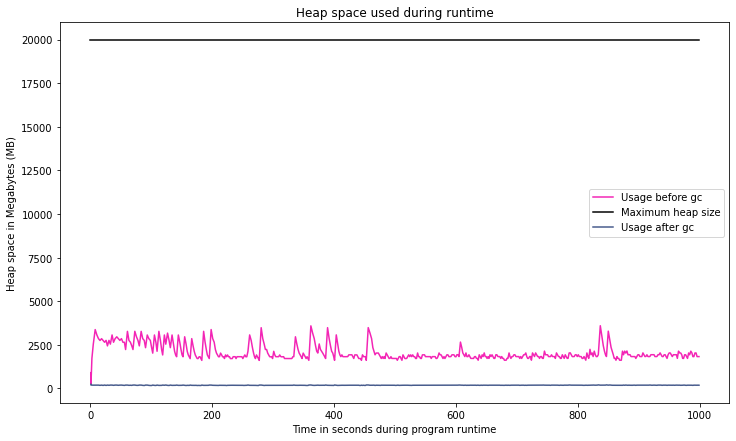

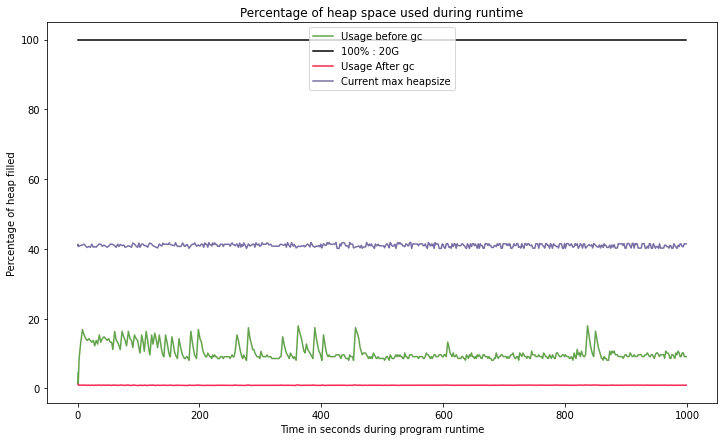

In [119]:
from src import graphing as graph
# Access the memory changed information 
before_gc, after_gc, max_heap, times_selected = transform.get_heap_occupancy(database_table)
max_heapsize = 20
heapsize_unit = "G"
# TODO: It is possible for the following to all be done with a single function call, since no new data is being created. This can be a second API file
print("Warning! Maximum heap size must be manually set, and may not be correct.")
g = graph.plot_heap_occupancy(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
_ = graph.plot_heap_occupancy(times_selected, after_gc, "M", max_heapsize, heapsize_unit, axs = g, label = "Usage after gc", plot_max=False)
# Create a second graph using percentages
g = graph.plot_heap_occupancy_percentage(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
g = graph.plot_heap_occupancy_percentage(times_selected, after_gc, "M", max_heapsize, heapsize_unit, label = "Usage After gc", axs = g, plot_max = False)
g = graph.plot_heap_occupancy_percentage(times_selected, max_heap, "M", max_heapsize, heapsize_unit, label = "Current max heapsize", axs = g, plot_max = False)
#allo = upl.getHeapAllocation(path1)

### Reclaimed bytes

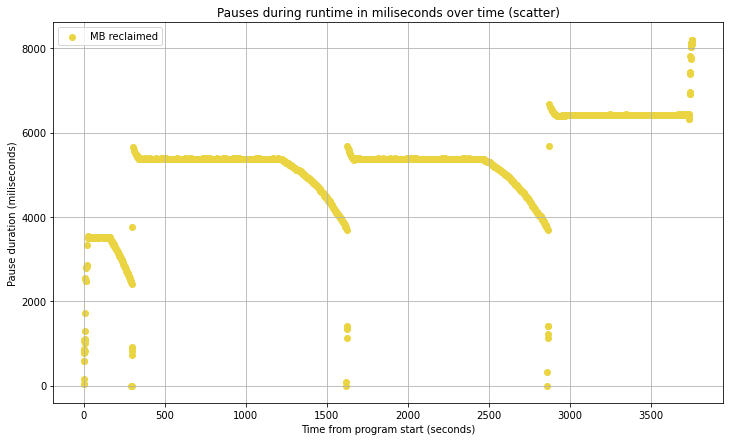

In [68]:
reclaimed, time_seconds = transform.get_reclaimed_mb_over_time(database_table)
f, axs = plt.subplots()
graph.plot_pauses_scatter(time_seconds, reclaimed, axs=axs, label = "MB reclaimed")

### Frequencies of STW pauses (X ms buckets)

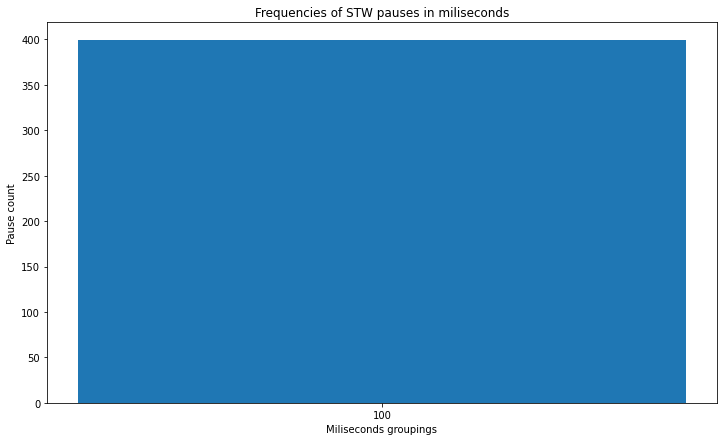

In [108]:
### Frequencies of STW pauses (X ms buckets)
bucket_size_ms = 100
o = transform.group_into_pause_buckets(stw_table, bucket_size_ms)
#######
fig, ax = plt.subplots()
labels = [str(i * bucket_size_ms)  for i in range(1, len(o) + 1)]
ax.bar(labels, height = o, align = 'center')
ax.set_xlabel('Miliseconds groupings')
ax.set_ylabel("Pause count")
_ = ax.set_title('Frequencies of STW pauses in miliseconds')
#fig.autofmt_xdate() # Used if labels are crowded. Enable to auto format rotate labels to fit more cleanly.
